In [1]:
import pandas as pd
from map import mean_average_precision

Читаю csv-файлы в датафреймы и изучаю как выглядят данные

In [2]:
gt = pd.read_csv('full_dataset/groundtruth.csv')
preds = pd.read_csv('full_dataset/predictions.csv')

In [3]:
preds

,clip_name,frame_num,obj_type,x,y,w,h,confidence
0,evzero blades OO9454.mp4,4,Cellphone,200,270,38,46,0.610414
1,evzero blades OO9454.mp4,4,SeatbeltNo,248,203,190,157,0.984375
2,evzero blades OO9454.mp4,4,Eyes,267,92,87,43,0.003906
3,evzero blades OO9454.mp4,4,Mouth,268,134,87,43,0.003906
4,evzero blades OO9454.mp4,4,Face,272,66,76,122,0.000000
...,...,...,...,...,...,...,...,...
2823382,090508095927_2.mp4,1646,Glasses,333,591,204,93,0.709576
2823383,090508095927_2.mp4,1647,SeatbeltYes,321,720,396,357,0.996094
2823384,090508095927_2.mp4,1647,Mouth,333,675,168,84,0.003906
2823385,090508095927_2.mp4,1647,Face,333,534,189,237,0.000000


In [4]:
gt

,clip_name,frame_num,obj_type,x,y,w,h,label
0,How Expensive are Good Sunglasses 25- 400 w En...,91,Face,519,10,248,357,Straight
1,How Expensive are Good Sunglasses 25- 400 w En...,91,Sunglasses,531,155,226,80,OnEyes
2,How Expensive are Good Sunglasses 25- 400 w En...,91,Eyes,547,150,194,63,Unknown
3,How Expensive are Good Sunglasses 25- 400 w En...,91,Mouth,594,269,107,45,Close
4,How Expensive are Good Sunglasses 25- 400 w En...,92,Face,519,10,248,357,Straight
...,...,...,...,...,...,...,...,...
1630713,090605150612_2.mp4,1646,Mouth,457,618,74,81,Open
1630714,090605150612_2.mp4,1647,Glasses,424,517,217,51,Open
1630715,090605150612_2.mp4,1647,Face,435,391,225,349,Straight
1630716,090605150612_2.mp4,1647,Eyes,447,504,124,51,Open


In [5]:
gt[gt['obj_type'] == 'Face']['label'].value_counts()

Straight    313981
Unknown      44940
Side         44635
Down         13856
Up            8760
Name: label, dtype: int64

In [6]:
gt['obj_type'].value_counts()

Face          426172
Eyes          414440
Mouth         398239
Glasses       164829
Sunglasses    142460
Cellphone      84578
Name: obj_type, dtype: int64

In [7]:
preds['obj_type'].value_counts()

Face           716255
Mouth          629795
SeatbeltNo     594729
Sunglasses     223908
Eyes           208835
Cellphone      172834
Glasses        172302
SeatbeltYes    104729
Name: obj_type, dtype: int64

In [8]:
obj_types = gt['obj_type'].unique()

In [9]:
preds = preds[preds['obj_type'].isin(obj_types)]

In [10]:
preds['obj_type'].value_counts()

Face          716255
Mouth         629795
Sunglasses    223908
Eyes          208835
Cellphone     172834
Glasses       172302
Name: obj_type, dtype: int64

Пример кадра, на котором есть метки, которые модель не распознала (False Negative)

In [11]:
gt.loc[(gt['clip_name'] == '20191216_123222.mp4') & (gt['frame_num'] == 3592)]

,clip_name,frame_num,obj_type,x,y,w,h,label
374878,20191216_123222.mp4,3592,Face,195,278,190,245,Unknown
374879,20191216_123222.mp4,3592,Glasses,213,400,156,60,Unknown
374880,20191216_123222.mp4,3592,Eyes,235,412,117,35,Unknown
374881,20191216_123222.mp4,3592,Mouth,269,480,56,25,Close
374882,20191216_123222.mp4,3592,Cellphone,300,700,84,20,Hard


In [12]:
preds.loc[(preds['clip_name'] == '20191216_123222.mp4') & (preds['frame_num'] == 3592)]

,clip_name,frame_num,obj_type,x,y,w,h,confidence
47480,20191216_123222.mp4,3592,Glasses,224,402,146,62,0.769557
47481,20191216_123222.mp4,3592,Face,230,368,126,160,0.000000
47482,20191216_123222.mp4,3592,Mouth,238,464,114,56,0.003906


Пример кадра, на котором модель ложно распознала метки, которых нет (False Positive)

In [13]:
gt.loc[(gt['clip_name'] == '20191216_123222.mp4') & (gt['frame_num'] == 68)]

,clip_name,frame_num,obj_type,x,y,w,h,label
363195,20191216_123222.mp4,68,Face,163,280,235,202,Side
363196,20191216_123222.mp4,68,Mouth,177,434,22,23,Close
363197,20191216_123222.mp4,68,Eyes,185,371,33,32,Unknown


In [14]:
preds.loc[(preds['clip_name'] == '20191216_123222.mp4') & (preds['frame_num'] == 68)]

,clip_name,frame_num,obj_type,x,y,w,h,confidence
33190,20191216_123222.mp4,68,Mouth,140,416,100,50,0.003906
33191,20191216_123222.mp4,68,Eyes,144,364,100,50,0.312500
33193,20191216_123222.mp4,68,Face,170,340,96,142,0.000000
33194,20191216_123222.mp4,68,Cellphone,224,546,138,72,0.552914


In [15]:
preds.loc[(preds['clip_name'] == '20191216_123222.mp4') & (preds['obj_type'] == 'Cellphone')]

,clip_name,frame_num,obj_type,x,y,w,h,confidence
33194,20191216_123222.mp4,68,Cellphone,224,546,138,72,0.552914
33203,20191216_123222.mp4,70,Cellphone,222,542,142,68,0.552914
33345,20191216_123222.mp4,106,Cellphone,222,548,136,56,0.558194
33350,20191216_123222.mp4,107,Cellphone,220,546,134,62,0.525194
33355,20191216_123222.mp4,108,Cellphone,228,544,132,60,0.543845
...,...,...,...,...,...,...,...,...
51550,20191216_123222.mp4,4457,Cellphone,202,410,46,106,0.510330
51959,20191216_123222.mp4,4559,Cellphone,192,408,54,100,0.509747
51964,20191216_123222.mp4,4560,Cellphone,186,412,58,100,0.590903
52470,20191216_123222.mp4,4686,Cellphone,236,508,130,74,0.579531


Соединяю разметку и предсказания в один датафрейм

In [16]:
df = gt.merge(preds, how='outer', left_on=['clip_name', 'frame_num', 'obj_type'], right_on=['clip_name', 'frame_num', 'obj_type'])

In [17]:
df.loc[(df['clip_name'] == '20191216_123222.mp4') & (df['frame_num'] == 3592)]

,clip_name,frame_num,obj_type,x_x,y_x,w_x,h_x,label,x_y,y_y,w_y,h_y,confidence
374878,20191216_123222.mp4,3592,Face,195.0,278.0,190.0,245.0,Unknown,230.0,368.0,126.0,160.0,0.000000
374879,20191216_123222.mp4,3592,Glasses,213.0,400.0,156.0,60.0,Unknown,224.0,402.0,146.0,62.0,0.769557
374880,20191216_123222.mp4,3592,Eyes,235.0,412.0,117.0,35.0,Unknown,NaN,NaN,NaN,NaN,NaN
374881,20191216_123222.mp4,3592,Mouth,269.0,480.0,56.0,25.0,Close,238.0,464.0,114.0,56.0,0.003906
374882,20191216_123222.mp4,3592,Cellphone,300.0,700.0,84.0,20.0,Hard,NaN,NaN,NaN,NaN,NaN


In [18]:
df.loc[(df['clip_name'] == '20191216_123222.mp4') & (df['frame_num'] == 68)]

,clip_name,frame_num,obj_type,x_x,y_x,w_x,h_x,label,x_y,y_y,w_y,h_y,confidence
363195,20191216_123222.mp4,68,Face,163.0,280.0,235.0,202.0,Side,170.0,340.0,96.0,142.0,0.000000
363196,20191216_123222.mp4,68,Mouth,177.0,434.0,22.0,23.0,Close,140.0,416.0,100.0,50.0,0.003906
363197,20191216_123222.mp4,68,Eyes,185.0,371.0,33.0,32.0,Unknown,144.0,364.0,100.0,50.0,0.312500
1646852,20191216_123222.mp4,68,Cellphone,NaN,NaN,NaN,NaN,NaN,224.0,546.0,138.0,72.0,0.552914


In [19]:
df = df.rename(columns={'x_x' : 'x_gt', 'y_x' : 'y_gt', 'w_x' : 'w_gt', 'h_x' : 'h_gt',
                        'x_y' : 'x_pred', 'y_y' : 'y_pred', 'w_y' : 'w_pred', 'h_y' : 'h_pred',})

Заполняю пропуски нулями

In [20]:
df = df.fillna(0)

In [21]:
df

,clip_name,frame_num,obj_type,x_gt,y_gt,w_gt,h_gt,label,x_pred,y_pred,w_pred,h_pred,confidence
0,How Expensive are Good Sunglasses 25- 400 w En...,91,Face,519.0,10.0,248.0,357.0,Straight,524.0,82.0,220.0,296.0,0.000000
1,How Expensive are Good Sunglasses 25- 400 w En...,91,Sunglasses,531.0,155.0,226.0,80.0,OnEyes,522.0,148.0,248.0,88.0,0.865158
2,How Expensive are Good Sunglasses 25- 400 w En...,91,Eyes,547.0,150.0,194.0,63.0,Unknown,528.0,140.0,212.0,106.0,0.085938
3,How Expensive are Good Sunglasses 25- 400 w En...,91,Mouth,594.0,269.0,107.0,45.0,Close,524.0,246.0,212.0,106.0,0.003906
4,How Expensive are Good Sunglasses 25- 400 w En...,92,Face,519.0,10.0,248.0,357.0,Straight,526.0,80.0,220.0,294.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659511,090508105732_2.mp4,1386,Sunglasses,0.0,0.0,0.0,0.0,0,381.0,516.0,186.0,60.0,0.520158
2659512,090508105732_2.mp4,1386,Cellphone,0.0,0.0,0.0,0.0,0,417.0,540.0,204.0,132.0,0.513950
2659513,090508105732_2.mp4,1387,Sunglasses,0.0,0.0,0.0,0.0,0,378.0,519.0,183.0,57.0,0.546035
2659514,090508105732_2.mp4,1393,Sunglasses,0.0,0.0,0.0,0.0,0,378.0,522.0,168.0,54.0,0.568684


In [22]:
df['obj_type'].unique()

array(['Face', 'Sunglasses', 'Eyes', 'Mouth', 'Cellphone', 'Glasses'],
      dtype=object)

Подсчет mAP для всего датасета

Face: 0.2554776668548584
Sunglasses: 0.21178151667118073
Eyes: 0.0705743134021759
Mouth: 0.0009461799054406583
Cellphone: 0.4981195330619812
Glasses: 0.8533702492713928


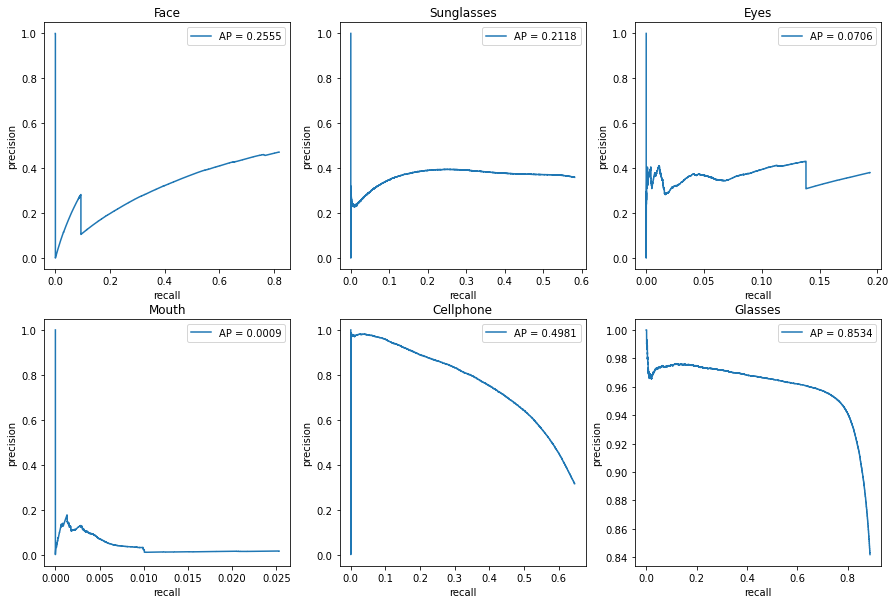

In [23]:
mAP = mean_average_precision(df, iou_threshold=0.4, plot_curves=True)

for type, val in mAP.items():
    print(f'{type}: {val}')

Подсчет mAP для всех сэмплов, где лейбл не "Unknown"

Face: 0.2386123239994049
Sunglasses: 0.27778077125549316
Mouth: 0.0008954039076343179
Eyes: 0.06917884945869446
Cellphone: 0.5414839386940002
Glasses: 0.8927746415138245


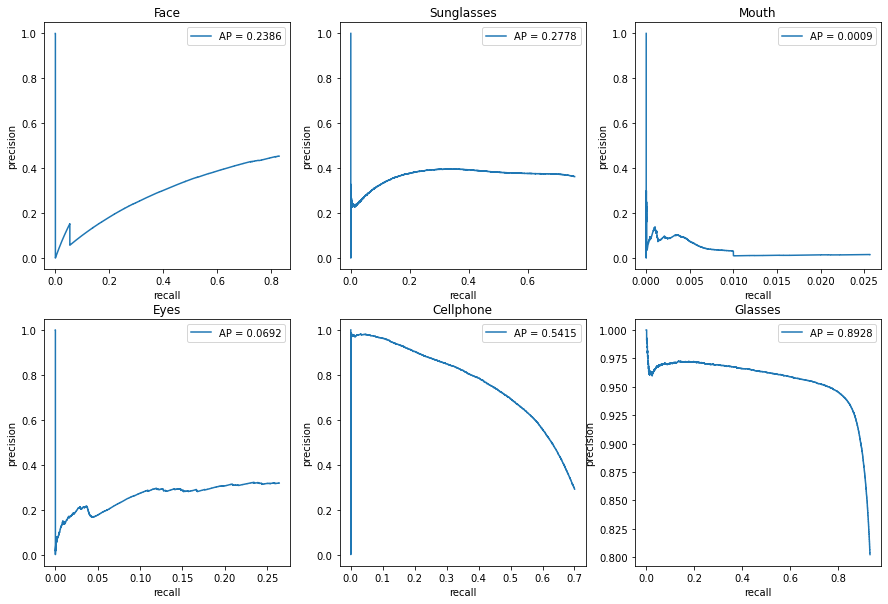

In [24]:
mAP = mean_average_precision(df[df['label'] != 'Unknown'], iou_threshold=0.4, plot_curves=True)

for type, val in mAP.items():
    print(f'{type}: {val}')